<a href="https://colab.research.google.com/github/drstannwoji2019/ML_Projects/blob/main/K_Means_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

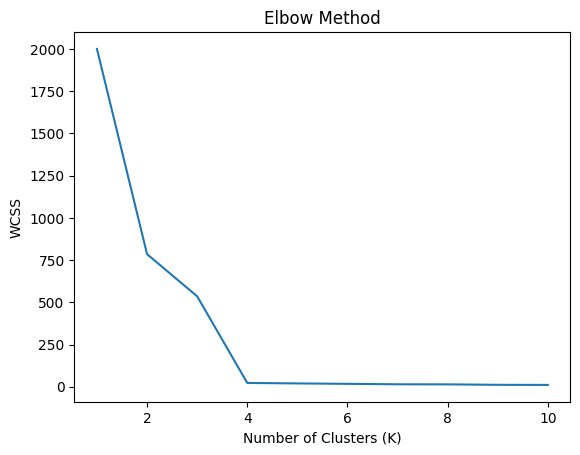

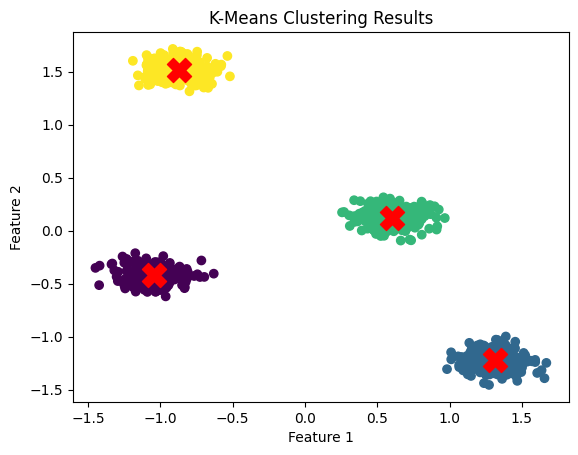

Silhouette Score for 4 clusters: 0.89


In [5]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Generate and Scale Data
data, _ = make_blobs(n_samples=1000, centers=4, cluster_std=0.2, random_state=0)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 2: Determine Optimal K (Elbow Method)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# Step 3: Fit K-Means Model with Chosen K
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
labels = kmeans.fit_predict(data_scaled)
centroids = kmeans.cluster_centers_

# Step 4: Visualize Clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')  # centroids
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 5: Evaluate with Silhouette Score
silhouette_avg = silhouette_score(data_scaled, labels)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg:.2f}")
